In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf


## Load and sanitize dataframe

In [29]:
df = hf.sanitize_and_anonymize_data(rerun=True)

print(f"{len(df)} entries, of which {np.sum(~df.is_postdoc)} are PhDs and {np.sum(df.is_postdoc)} are postdocs")
df.head(5)


Interested in the following sports, but not available:
Volleyball 4
Running/Sprints 1
Basketball 2
Chess 1
Tennis 0
Football 2
Capture the flag 3
Spikeball 2
Beer Pong 2
Ping Pong 2
Fooseball 2
90 entries, of which 70 are PhDs and 20 are postdocs


,nickname,institute,is_postdoc,avail_monday,avail_tuesday,avail_thursday,avail_friday,wants_volleyball,volleyball,wants_running_sprints,...,spikeball,wants_beer_pong,beer_pong,wants_ping_pong,ping_pong,wants_fooseball,fooseball,num_sports,num_sports_not_avail,late_entry
0,Pushy Bulldog,MPE,False,True,True,True,True,True,True,True,...,True,False,False,True,True,False,False,7,0,False
1,Thankful Kakapo,MPE,False,True,True,True,True,False,False,True,...,True,True,True,True,True,True,True,7,0,False
2,Exemplary Cassowary,MPA,False,True,True,True,True,True,True,False,...,True,True,True,False,False,False,False,4,0,False
3,Magnificent Barracuda,MPE,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,9,0,False
4,Dishonest Fangtooth,MPA,False,False,True,True,True,True,False,False,...,True,True,True,True,True,True,True,5,2,False


Text(0.5, 0, 'Number of sports players showed interest in but are not available')

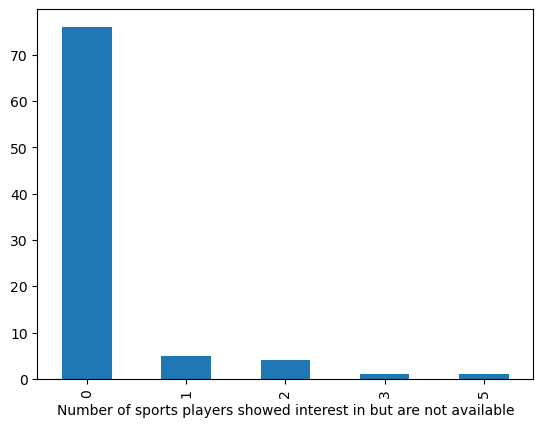

In [23]:
# df.plot.hist("num_sports_not_avail")
df["num_sports_not_avail"].value_counts().sort_index().plot.bar()
plt.xlabel("Number of sports players showed interest in but are not available")


In [37]:
best_seed = 516 # hf.find_optimal_team_seed(df, 3, num_tries=999)
print(best_seed)


516


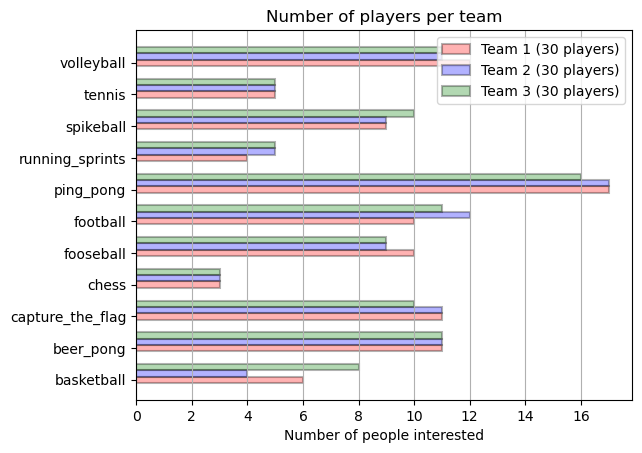

In [38]:
teams = hf.create_teams(df, 3, best_seed, from_backup=False, create_backup=False)
fig, ax = plt.subplots()
for team in teams:
    team.plot_sports_num()
ax.set_title("Number of players per team")
ax.legend()


In [43]:
for team in teams:
    subteams = team.get_subteams_for_sport(hf.SPORTS_EVENTS["volleyball"])
    print([key + str(team["nickname"].tolist()) for key, team in subteams.items()])
team.player_df[["nickname", "subteam_volleyball"]]


["A['Scientific Angelfish', 'Clever Wombat', 'Pushy Bulldog', 'Flamboyant Lungfish']", "B['Tan Crane', 'Exemplary Cassowary', 'Clumsy Lizard', 'Alarmed Bird']"]
["A['Tame Mink', 'Amusing Seal', 'Trifling Tarpon', 'Limp Monkey']", "B['Magnificent Barracuda', 'Well-documented Dodo', 'Trivial Uguisu', 'Reflecting Pug']"]
["A['Failing Muskrat', 'Excited Rabbit', 'Nutty Sheep', 'Wide Lionfish']", "B['Damaged Fly', 'Grouchy Mole', 'Dramatic Hyena', 'Rewarding Ermine']"]


,nickname,subteam_volleyball
2,Extra-small Coyote,-
5,Excited Rabbit,A
8,Reckless Swan,-
11,Separate Akbash,-
14,Mammoth Barnacle,-
17,Fine Oyster,-
20,Dramatic Hyena,B
23,Overjoyed Tapir,-
26,Hasty Emu,-
29,Damaged Fly,B


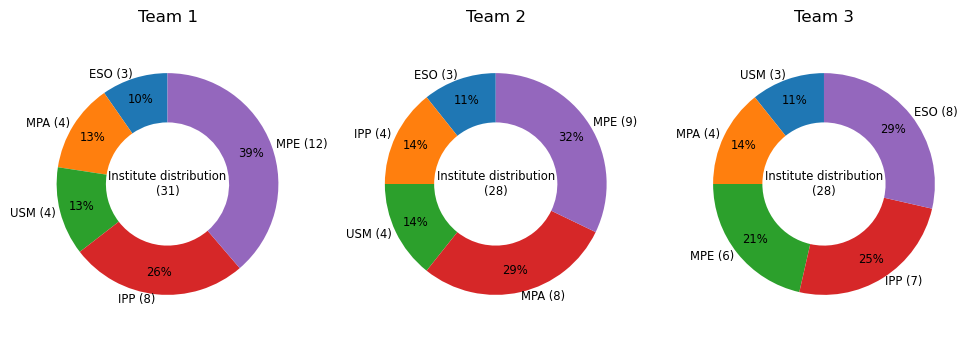

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, team in zip(axes, teams):
    plt.sca(ax)
    hf.create_institute_plot(team.player_df)
    ax.set_title(team.name)


In [21]:
teams[0].get_all_players_for_sport("chess")


,nickname,institute,is_postdoc,volleyball,running_sprints,basketball,chess,tennis,football,capture_the_flag,spikeball,beer_pong,ping_pong,fooseball,num_sports,avail_monday,avail_tuesday,avail_thursday,avail_friday,late_entry
55,Clever Wombat,IPP,False,True,False,False,True,False,False,False,False,False,True,False,3,True,True,False,True,False
61,Trifling Tarpon,IPP,False,True,False,False,True,False,True,False,False,False,True,False,4,True,True,True,True,False
75,Awkward Cichlid,USM,False,False,False,False,True,False,True,False,True,False,True,False,4,True,True,True,True,False


## Make some plots

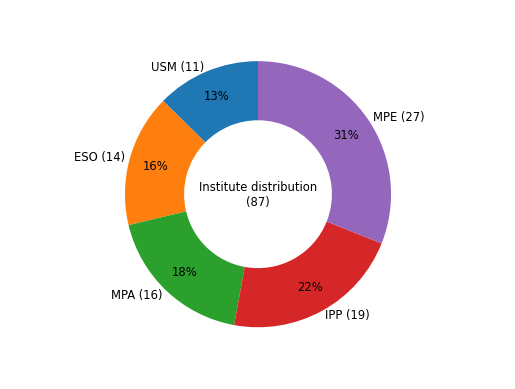

In [148]:
# Distribution of institutes
hf.create_institute_plot(df)


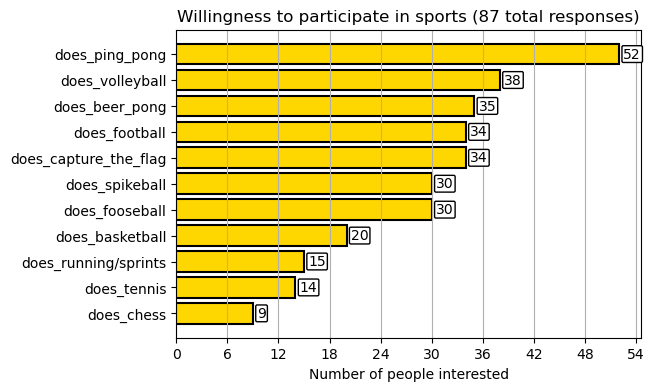

In [10]:
# Overall distribution of sports
fig, ax = plt.subplots(figsize=(6, 4))
hf.create_sports_num_plot(df, annotate_numbers=True, sort_bars=True)
